In [14]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Function to generate random dates
def generate_random_dates(start_date, end_date, num_dates):
    return [start_date + timedelta(days=np.random.randint(0, (end_date - start_date).days)) for _ in range(num_dates)]

# Parameters
num_records = 1000
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)

# Generate data
np.random.seed(42)
date_range = generate_random_dates(start_date, end_date, num_records)
sales = np.random.randint(100, 1000, size=num_records)
categories = np.random.choice(['Electronics', 'Clothing', 'Furniture', 'Toys', 'Books'], size=num_records)

# Create DataFrame
data = {
    'date': [date.strftime('%Y-%m-%d') for date in date_range],
    'sales': sales,
    'category': categories
}
df = pd.DataFrame(data)

# Save to CSV
csv_file = 'sales_data.csv'
df.to_csv(csv_file, index=False)

print(f'Sales data saved to {csv_file}')


Sales data saved to sales_data.csv


In [21]:
import pandas as pd

# Load dataset
df = pd.read_csv('sales_data.csv')

# Explore data
print(df.head())

# Handle missing values
df.fillna(method='ffill', inplace=True)

# Encode categorical variables if needed
df = pd.get_dummies(df, columns=['category'])


         date  sales  category
0  2023-04-13    271  Clothing
1  2023-12-15    997  Clothing
2  2023-09-28    112  Clothing
3  2023-04-17    267  Clothing
4  2023-03-13    741  Clothing


C:\Users\enesi\AppData\Local\Temp\ipykernel_19316\1808028814.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


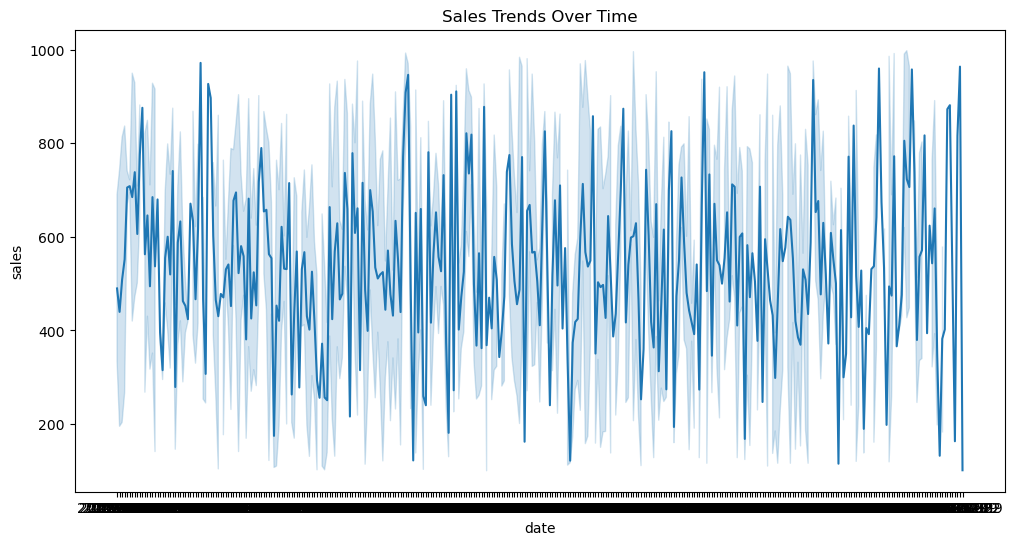

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sales trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='sales')
plt.title('Sales Trends Over Time')
plt.show()


In [23]:
# Convert date to numerical features
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek
df['year'] = df['date'].dt.year

# Drop the original date column
df.drop('date', axis=1, inplace=True)


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define features and target
X = df.drop('sales', axis=1)
y = df['sales']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 86958.39346777753


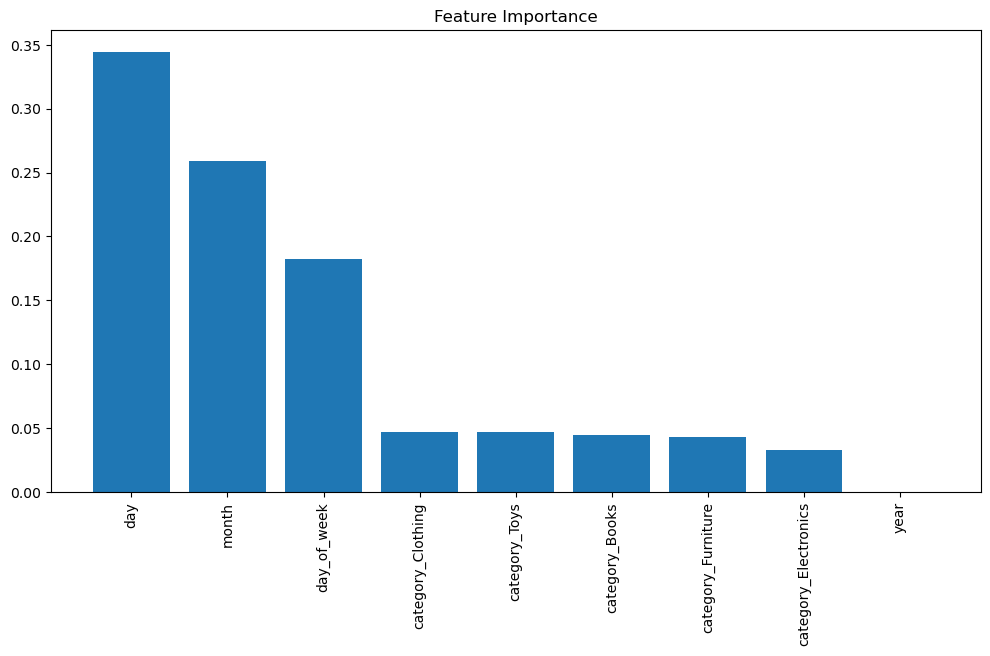

In [25]:
# Feature importance
importances = model.feature_importances_
feature_names = X.columns
sorted_indices = importances.argsort()[::-1]

plt.figure(figsize=(12, 6))
plt.bar(range(X.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[sorted_indices], rotation=90)
plt.title('Feature Importance')
plt.show()
